- Which trait\(s\) is the year produced most heavily correlated with?
  - Helps answer: Is it just the car's age that makes it less valuable or is it these other traits?
- Do factors that do/don't affect the car's performance \(like mileage vs. color\) affect its price?
  - Somewhat related: Are the more expensive cars all at a certain location?



In [1]:
import pandas as pd

In [2]:
car_df = pd.read_csv("data/car_data.csv")

In [3]:
car_df.drop(["feature_0","feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7","feature_8","feature_9"], axis=1, inplace=True)

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [4]:
car_df["manufacturer_name"].value_counts()

Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Mazda            1328
Toyota           1246
Hyundai          1116
Skoda            1089
Kia               912
Mitsubishi        887
Fiat              824
Honda             797
Volvo             721
ВАЗ               481
Chevrolet         436
Chrysler          410
Seat              303
Dodge             297
Subaru            291
Rover             235
Suzuki            234
Daewoo            221
Lexus             213
Alfa Romeo        207
ГАЗ               200
Land Rover        184
Infiniti          162
LADA              146
Iveco             139
Saab              108
Jeep              107
Lancia             92
SsangYong          79
УАЗ                74
Geely              71
Mini               68
Acura              66
Porsche            61
Dacia              59
Chery     

In [9]:
expensive = max(car_df["price_usd"])
car_df[car_df["price_usd"] == expensive].head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
7691,Jaguar,F-Type,automatic,red,64075,2013,gasoline,False,gasoline,3.0,coupe,False,owned,rear,50000.0,True,Минская обл.,19,12,15
29297,BMW,X6,automatic,grey,59000,2015,diesel,False,diesel,3.0,suv,False,owned,all,50000.0,True,Минская обл.,31,8,89


In [10]:
cheapest = min(car_df["price_usd"])
car_df[car_df["price_usd"] == cheapest].head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed
8230,ВАЗ,2105,mechanical,red,999999,1991,gasoline,False,gasoline,1.2,sedan,False,owned,rear,1.0,False,Гродненская обл.,8,1,1
8770,Fiat,Palio,mechanical,red,260000,1998,gasoline,False,gasoline,1.6,universal,False,emergency,front,1.0,False,Минская обл.,2,2,2
16406,Volkswagen,T4 Caravelle,mechanical,white,1,1995,diesel,False,diesel,2.4,minibus,False,owned,front,1.0,False,Минская обл.,6,1,3
30149,Mazda,626,mechanical,black,300000,1987,gasoline,False,gasoline,2.0,coupe,False,owned,front,1.0,True,Минская обл.,5,1,0
36634,Peugeot,406,mechanical,blue,200000,1997,gasoline,False,gasoline,1.6,sedan,False,emergency,front,1.0,False,Минская обл.,1,1,1


Out of the cars listed, cheaper cars are shown to have mechanical transmission, higher odometer value \(with one exception\), older production year, smaller engine capacity, fewer photos, and lower up counter and duration listed.


In [11]:
car_df["transmission"].value_counts()

mechanical    25633
automatic     12898
Name: transmission, dtype: int64

array([[<AxesSubplot:title={'center':'price_usd'}>]], dtype=object)

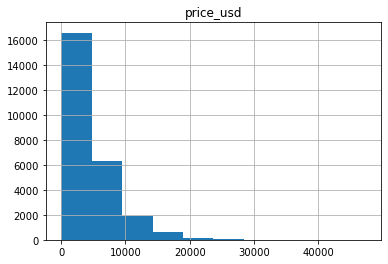

In [12]:
car_df[car_df["transmission"] == "mechanical"].hist(column="price_usd")

array([[<AxesSubplot:title={'center':'price_usd'}>]], dtype=object)

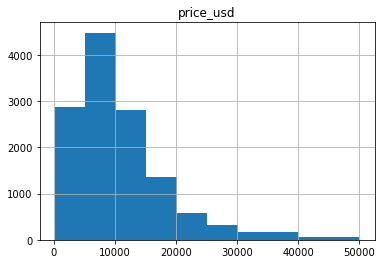

In [13]:
car_df[car_df["transmission"] == "automatic"].hist(column="price_usd")

<AxesSubplot:xlabel='year_produced', ylabel='price_usd'>

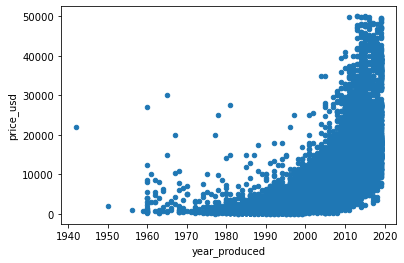

In [14]:
car_df.plot.scatter(x="year_produced", y="price_usd")

<AxesSubplot:xlabel='engine_capacity', ylabel='price_usd'>

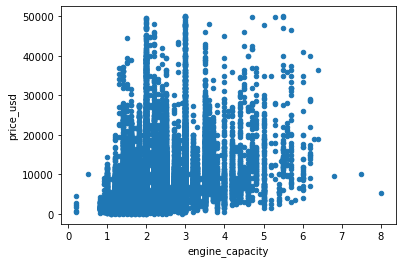

In [15]:
car_df.plot.scatter(x="engine_capacity", y="price_usd")

<AxesSubplot:xlabel='odometer_value', ylabel='price_usd'>

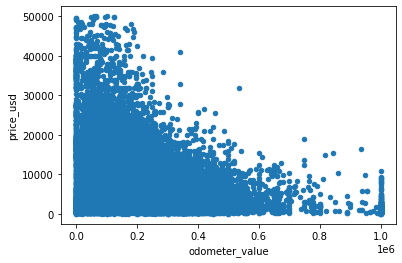

In [16]:
car_df.plot.scatter(x="odometer_value", y="price_usd")

array([[<AxesSubplot:title={'center':'price_usd'}>]], dtype=object)

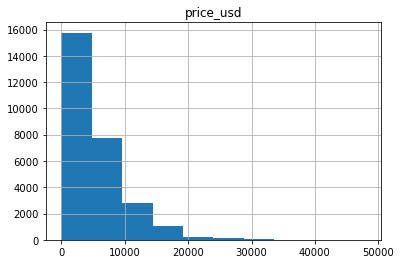

In [17]:
car_df[car_df["drivetrain"] == "front"].hist(column="price_usd")

In [21]:
car_df[(car_df["drivetrain"] == "rear") | (car_df["drivetrain"] == "all")]["drivetrain"].value_counts()

rear    5398
all     5387
Name: drivetrain, dtype: int64

array([[<AxesSubplot:title={'center':'price_usd'}>]], dtype=object)

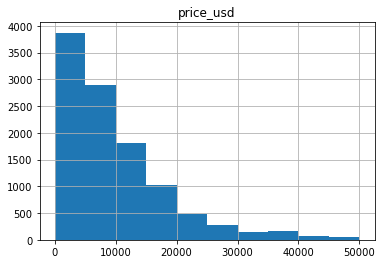

In [19]:
car_df[(car_df["drivetrain"] == "rear") | (car_df["drivetrain"] == "all")].hist(column="price_usd")